True Motif: CACGCGATGGGTGGC

Refined Motifs:
Cluster 1: TTGAGTGGCTAACTA
Cluster 2: CGTGATGCGTGGTGT
Cluster 3: TGGGTTGCATGATGT
Cluster 4: CCAATCAAGGACTCA
Cluster 5: ACTCGGTCGGTGGCA
Cluster 6: TGGCACTCGCCGGCC
Cluster 7: TAAGTTGTCTTTGCC
Cluster 8: CCGTTGTCCAGTTTC
Cluster 9: ATGTCCTATCGCAAA
Cluster 10: CTTAATGCAGTGGAG

Final Score (Average Hamming Distance): 11.50
Average Accuracy: 0.23
Average Recall: 0.23


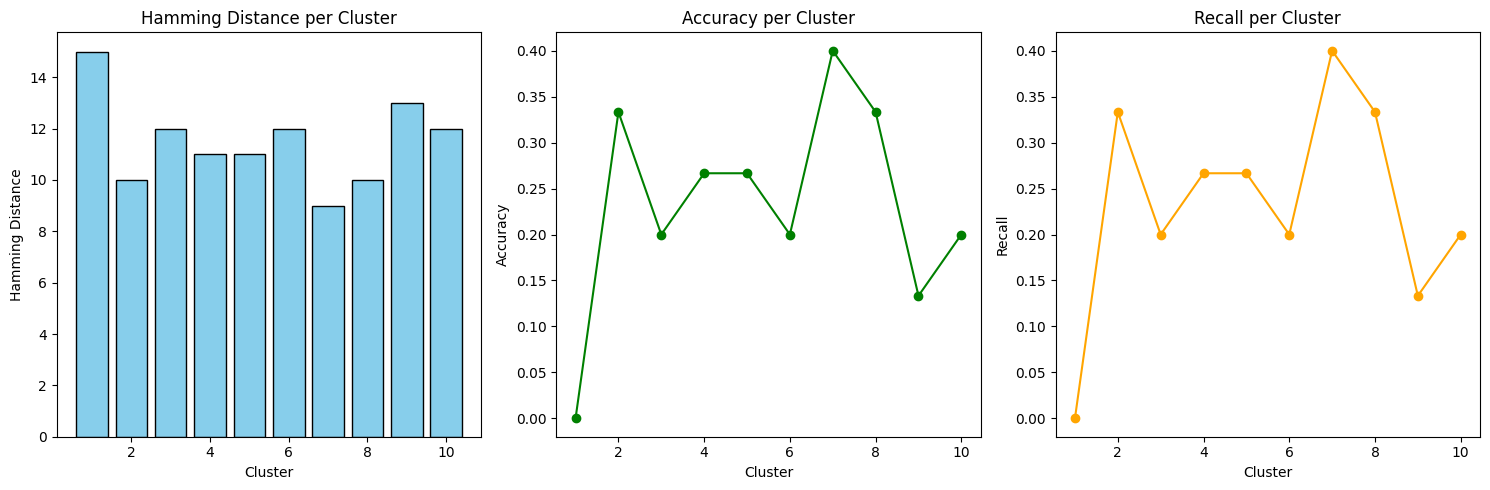

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to generate a random DNA sequence of length N
def generate_dna_sequence(N):
    return ''.join(random.choice('ACGT') for _ in range(N))

# Generate t sequences with a motif of length k implanted with mutations
def generate_dna_sequences(t, N, k, d):
    sequences = []
    motif = ''.join(random.choice('ACGT') for _ in range(k))

    for _ in range(t):
        seq = list(generate_dna_sequence(N))
        start = random.randint(0, N - k)
        for i in range(k):
            if random.random() < d / k:  # Mutation with probability d/k
                seq[start + i] = random.choice('ACGT')
            else:
                seq[start + i] = motif[i]  # Keep original motif character
        sequences.append(''.join(seq))
    return sequences, motif

# Hamming distance between two strings
def hamming_distance(seq1, seq2):
    return sum([1 for a, b in zip(seq1, seq2) if a != b])

# Clustering based on Hamming distance
def cluster_sequences(sequences, k, d):
    clusters = []
    for seq in sequences:
        added = False
        for cluster in clusters:
            if hamming_distance(seq, cluster[0]) <= d:
                cluster.append(seq)
                added = True
                break
        if not added:
            clusters.append([seq])
    return clusters

# Extract most common k-mer from cluster as refined motif
def refine_motifs_in_cluster(cluster, k):
    motifs = []
    for seq in cluster:
        motifs.extend([seq[i:i+k] for i in range(len(seq)-k+1)])
    motif_counts = {motif: motifs.count(motif) for motif in set(motifs)}
    return max(motif_counts, key=motif_counts.get)

# Run full Cluster Refinement Algorithm
def cluster_refinement_algorithm(sequences, k, d):
    clusters = cluster_sequences(sequences, k, d)
    refined_motifs = [refine_motifs_in_cluster(cluster, k) for cluster in clusters]
    return refined_motifs

# Hamming, Accuracy, Recall and Final Score
def calculate_scores(true_motif, refined_motifs):
    hamming_scores = []
    accuracies = []
    recalls = []

    for motif in refined_motifs:
        hd = hamming_distance(true_motif, motif)
        hamming_scores.append(hd)

        # Accuracy: % of matching positions out of total (k)
        match_count = sum(1 for a, b in zip(true_motif, motif) if a == b)
        accuracy = match_count / len(true_motif)

        # Recall = TP / (TP + FN) assuming motif chars are positive
        recall = match_count / len(true_motif)

        accuracies.append(accuracy)
        recalls.append(recall)

    final_score = sum(hamming_scores) / len(hamming_scores) if refined_motifs else float('inf')
    return hamming_scores, accuracies, recalls, final_score

# Visualization
def visualize_results(hamming_scores, accuracies, recalls):
    clusters = list(range(1, len(hamming_scores) + 1))

    plt.figure(figsize=(15, 5))

    # Hamming Distance
    plt.subplot(1, 3, 1)
    plt.bar(clusters, hamming_scores, color='skyblue', edgecolor='black')
    plt.title("Hamming Distance per Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Hamming Distance")

    # Accuracy
    plt.subplot(1, 3, 2)
    plt.plot(clusters, accuracies, marker='o', color='green')
    plt.title("Accuracy per Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Accuracy")

    # Recall
    plt.subplot(1, 3, 3)
    plt.plot(clusters, recalls, marker='o', color='orange')
    plt.title("Recall per Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Recall")

    plt.tight_layout()
    plt.show()

# ---------- MAIN ----------

# Parameters
t = 10
N = 100
k = 15
d = 4

# Generate and process
sequences, true_motif = generate_dna_sequences(t, N, k, d)
refined_motifs = cluster_refinement_algorithm(sequences, k, d)

print("True Motif:", true_motif)
print("\nRefined Motifs:")
for i, motif in enumerate(refined_motifs, 1):
    print(f"Cluster {i}: {motif}")

# Calculate Scores
hamming_scores, accuracies, recalls, final_score = calculate_scores(true_motif, refined_motifs)

print(f"\nFinal Score (Average Hamming Distance): {final_score:.2f}")
print(f"Average Accuracy: {np.mean(accuracies):.2f}")
print(f"Average Recall: {np.mean(recalls):.2f}")

# Visualize Results
visualize_results(hamming_scores, accuracies, recalls)



True Motif: AAAGGTGTAAGTGAA

Refined Motifs:
Cluster 1: CGCCACTTAAGACAG
Cluster 2: GATTTAGGATCGGCC
Cluster 3: AACGGAGGTAGTGCA
Cluster 4: CTAGATGAGGAATAA
Cluster 5: GCCATCACTAGGGCA
Cluster 6: AAGTAGCCGTTCCTA
Cluster 7: CGCGCTCGGTGTAAC
Cluster 8: TTCAATCGAAGGAGC
Cluster 9: CAGCTAGAGGATTTC
Cluster 10: TGCGAACCACGTGGT

Average Hamming Distance: 10.10
Average Accuracy: 0.33
Average Recall: 0.33


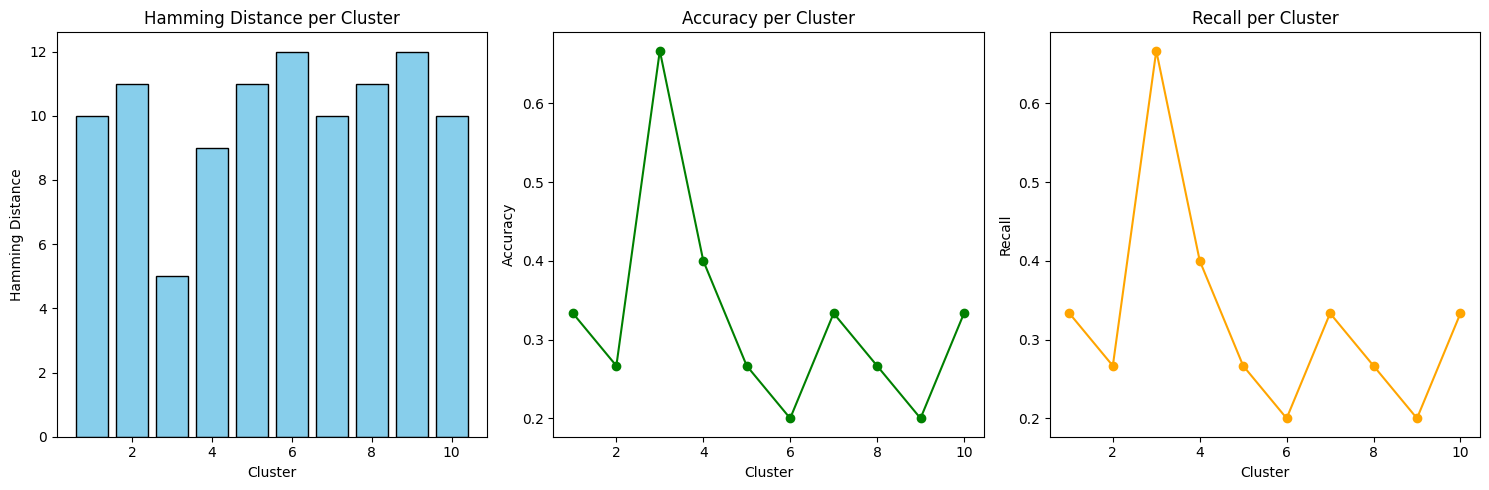

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to generate a random DNA sequence of length N
def generate_dna_sequence(N):
    return ''.join(random.choice('ACGT') for _ in range(N))

# Function to generate t random DNA sequences with a motif of length k implanted at random locations with mutations
def generate_dna_sequences(t, N, k, d):
    sequences = []
    motif = ''.join(random.choice('ACGT') for _ in range(k))

    for _ in range(t):
        seq = list(generate_dna_sequence(N))
        start = random.randint(0, N - k)
        for i in range(k):
            if random.random() < d / k:  # Introduce mutation
                seq[start + i] = random.choice('ACGT')
            else:
                seq[start + i] = motif[i]  # Keep motif character
        sequences.append(''.join(seq))
    return sequences, motif

# Hamming distance
def hamming_distance(seq1, seq2):
    return sum([1 for a, b in zip(seq1, seq2) if a != b])

# Clustering based on Hamming similarity
def cluster_sequences(sequences, k, d):
    clusters = []
    for seq in sequences:
        added_to_cluster = False
        for cluster in clusters:
            if hamming_distance(seq, cluster[0]) <= d:
                cluster.append(seq)
                added_to_cluster = True
                break
        if not added_to_cluster:
            clusters.append([seq])
    return clusters

# Extract most common motif from each cluster
def refine_motifs_in_cluster(cluster, k):
    motifs = []
    for seq in cluster:
        motifs.extend([seq[i:i+k] for i in range(len(seq) - k + 1)])
    motif_counts = {motif: motifs.count(motif) for motif in set(motifs)}
    refined_motif = max(motif_counts, key=motif_counts.get)
    return refined_motif

# Full cluster refinement process
def cluster_refinement_algorithm(sequences, k, d):
    clusters = cluster_sequences(sequences, k, d)
    refined_motifs = [refine_motifs_in_cluster(cluster, k) for cluster in clusters]
    return refined_motifs

# Scoring: hamming, accuracy, recall
def calculate_scores(true_motif, refined_motifs):
    hamming_scores = []
    accuracies = []
    recalls = []

    for motif in refined_motifs:
        hd = hamming_distance(true_motif, motif)
        hamming_scores.append(hd)

        match = sum(1 for a, b in zip(true_motif, motif) if a == b)
        accuracy = match / len(true_motif)
        recall = match / len(true_motif)  # Same as accuracy in this binary context

        accuracies.append(accuracy)
        recalls.append(recall)

    avg_hamming = np.mean(hamming_scores)
    avg_accuracy = np.mean(accuracies)
    avg_recall = np.mean(recalls)

    return hamming_scores, accuracies, recalls, avg_hamming, avg_accuracy, avg_recall

# Visualization
def visualize_results(hamming_scores, accuracies, recalls):
    clusters = list(range(1, len(hamming_scores) + 1))

    plt.figure(figsize=(15, 5))

    # Hamming Distance Bar Chart
    plt.subplot(1, 3, 1)
    plt.bar(clusters, hamming_scores, color='skyblue', edgecolor='black')
    plt.title("Hamming Distance per Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Hamming Distance")

    # Accuracy Line Plot
    plt.subplot(1, 3, 2)
    plt.plot(clusters, accuracies, marker='o', color='green')
    plt.title("Accuracy per Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Accuracy")

    # Recall Line Plot
    plt.subplot(1, 3, 3)
    plt.plot(clusters, recalls, marker='o', color='orange')
    plt.title("Recall per Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Recall")

    plt.tight_layout()
    plt.show()

# ------------------- MAIN -------------------
t = 10  # Number of sequences
N = 100  # Sequence length
k = 15   # Motif length
d = 8    # Mutations

sequences, true_motif = generate_dna_sequences(t, N, k, d)
refined_motifs = cluster_refinement_algorithm(sequences, k, d)

print("True Motif:", true_motif)
print("\nRefined Motifs:")
for i, motif in enumerate(refined_motifs, 1):
    print(f"Cluster {i}: {motif}")

# Calculate and print scores
hamming_scores, accuracies, recalls, avg_hamming, avg_accuracy, avg_recall = calculate_scores(true_motif, refined_motifs)

print(f"\nAverage Hamming Distance: {avg_hamming:.2f}")
print(f"Average Accuracy: {avg_accuracy:.2f}")
print(f"Average Recall: {avg_recall:.2f}")

# Show plot
visualize_results(hamming_scores, accuracies, recalls)


True Motif: GACTTCGGAATCCAC
Refined Motifs:
Cluster 1: CTTCGACCTCCCCAT
Cluster 2: GACTTCGGAATCCAC
Cluster 3: CATATGTCGAGCGAC
Cluster 4: GACTTCGGAATCCAC
Cluster 5: TGAAACCACATCTTT
Cluster 6: TGCATATCTAGACGT
Cluster 7: GACTTCGGAATCCAC
Cluster 8: CAGTGACTTCGGAAT
Cluster 9: CAAACTGGGACTTCA
Cluster 10: TAGCGTTATTTCCTA

Average Hamming Distance: 7.70
Average Accuracy: 0.49
Average Recall: 0.49


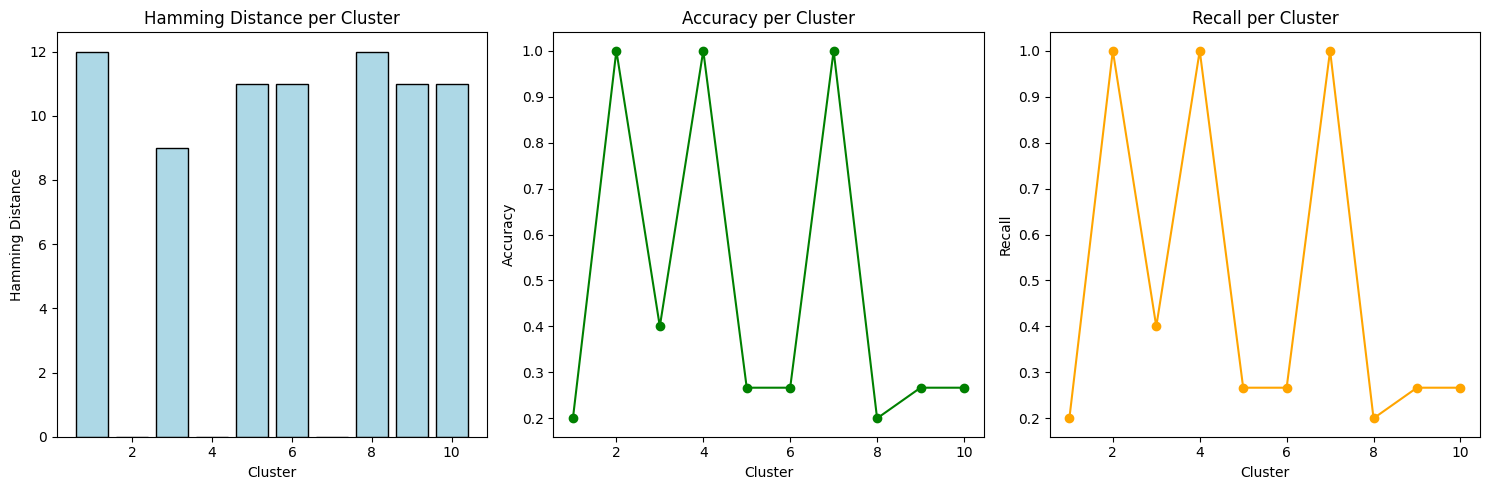

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Generate random DNA sequence
def generate_dna_sequence(N):
    return ''.join(random.choice('ACGT') for _ in range(N))

# Generate t DNA sequences with a motif implanted with d mutations
def generate_dna_sequences(t, N, k, d):
    sequences = []
    motif = ''.join(random.choice('ACGT') for _ in range(k))

    for _ in range(t):
        seq = list(generate_dna_sequence(N))
        start = random.randint(0, N - k)
        for i in range(k):
            if random.random() < d / k:
                seq[start + i] = random.choice('ACGT')
            else:
                seq[start + i] = motif[i]
        sequences.append(''.join(seq))
    return sequences, motif

# Hamming Distance
def hamming_distance(seq1, seq2):
    return sum(1 for a, b in zip(seq1, seq2) if a != b)

# Clustering by motif similarity
def cluster_sequences(sequences, k, d):
    clusters = []
    for seq in sequences:
        added = False
        for cluster in clusters:
            if hamming_distance(seq, cluster[0]) <= d:
                cluster.append(seq)
                added = True
                break
        if not added:
            clusters.append([seq])
    return clusters

# Refine motifs in each cluster
def refine_motifs_in_cluster(cluster, k):
    motifs = []
    for seq in cluster:
        motifs += [seq[i:i+k] for i in range(len(seq)-k+1)]
    motif_counts = {m: motifs.count(m) for m in set(motifs)}
    refined_motif = max(motif_counts, key=motif_counts.get)
    return refined_motif

# Full refinement algorithm
def cluster_refinement_algorithm(sequences, k, d):
    clusters = cluster_sequences(sequences, k, d)
    refined_motifs = [refine_motifs_in_cluster(cluster, k) for cluster in clusters]
    return refined_motifs

# Evaluation metrics
def evaluate_motifs(true_motif, refined_motifs):
    hamming_scores = []
    accuracies = []
    recalls = []

    for motif in refined_motifs:
        hd = hamming_distance(true_motif, motif)
        hamming_scores.append(hd)

        matches = sum(1 for a, b in zip(true_motif, motif) if a == b)
        accuracy = matches / len(true_motif)
        recall = matches / len(true_motif)

        accuracies.append(accuracy)
        recalls.append(recall)

    avg_hamming = np.mean(hamming_scores)
    avg_accuracy = np.mean(accuracies)
    avg_recall = np.mean(recalls)

    return hamming_scores, accuracies, recalls, avg_hamming, avg_accuracy, avg_recall

# Visualization of results
def visualize_results(hamming_scores, accuracies, recalls):
    clusters = list(range(1, len(hamming_scores) + 1))

    plt.figure(figsize=(15, 5))

    # Hamming Distance
    plt.subplot(1, 3, 1)
    plt.bar(clusters, hamming_scores, color='lightblue', edgecolor='black')
    plt.title("Hamming Distance per Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Hamming Distance")

    # Accuracy
    plt.subplot(1, 3, 2)
    plt.plot(clusters, accuracies, marker='o', color='green')
    plt.title("Accuracy per Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Accuracy")

    # Recall
    plt.subplot(1, 3, 3)
    plt.plot(clusters, recalls, marker='o', color='orange')
    plt.title("Recall per Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Recall")

    plt.tight_layout()
    plt.show()

# ------------------- Main -------------------

# Parameters
t = 10
N = 100
k = 15
d = 1

# Generate sequences
sequences, true_motif = generate_dna_sequences(t, N, k, d)

# Run algorithm
refined_motifs = cluster_refinement_algorithm(sequences, k, d)

# Output
print("True Motif:", true_motif)
print("Refined Motifs:")
for i, motif in enumerate(refined_motifs):
    print(f"Cluster {i + 1}: {motif}")

# Scores
hamming_scores, accuracies, recalls, avg_hamming, avg_accuracy, avg_recall = evaluate_motifs(true_motif, refined_motifs)

# Display final average scores
print(f"\nAverage Hamming Distance: {avg_hamming:.2f}")
print(f"Average Accuracy: {avg_accuracy:.2f}")
print(f"Average Recall: {avg_recall:.2f}")

# Visualization
visualize_results(hamming_scores, accuracies, recalls)


True Motif: ACACCCCTCGTGATG
Refined Motifs:
Cluster 1: ACGTGACCGCACATA
Cluster 2: CCTGGGCTCTAACAT
Cluster 3: TTACAGTATGCGAAG
Cluster 4: CGGTGCACCCCTTCT
Cluster 5: CTACGGGGTGCCACC
Cluster 6: CCACTGGATCTGTAT
Cluster 7: TCACCTCTTGTGCTG
Cluster 8: TGCTTCCTACTTGGG
Cluster 9: TTCAAAGACTACAAA
Cluster 10: TATGCTCGATCGCGC

Average Hamming Distance: 10.30
Average Accuracy: 0.31
Average Recall: 0.31


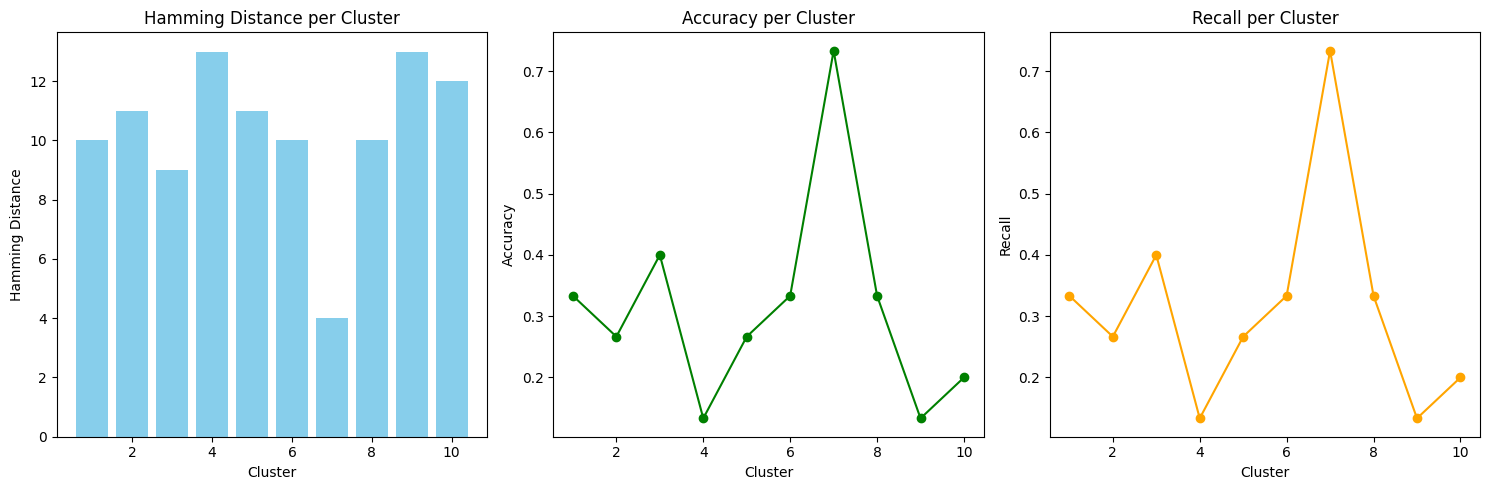

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Generate random DNA sequence
def generate_dna_sequence(N):
    return ''.join(random.choice('ACGT') for _ in range(N))

# Generate DNA sequences with implanted motif and mutations
def generate_dna_sequences(t, N, k, d):
    sequences = []
    motif = ''.join(random.choice('ACGT') for _ in range(k))

    for _ in range(t):
        seq = list(generate_dna_sequence(N))
        start = random.randint(0, N - k)
        for i in range(k):
            if random.random() < d / k:
                seq[start + i] = random.choice('ACGT')
            else:
                seq[start + i] = motif[i]
        sequences.append(''.join(seq))
    return sequences, motif

# Hamming distance between two strings
def hamming_distance(seq1, seq2):
    return sum([1 for a, b in zip(seq1, seq2) if a != b])

# Cluster sequences based on similarity
def cluster_sequences(sequences, k, d):
    clusters = []
    for seq in sequences:
        added = False
        for cluster in clusters:
            if hamming_distance(seq, cluster[0]) <= d:
                cluster.append(seq)
                added = True
                break
        if not added:
            clusters.append([seq])
    return clusters

# Refine motifs in each cluster
def refine_motifs_in_cluster(cluster, k):
    motifs = []
    for seq in cluster:
        motifs += [seq[i:i+k] for i in range(len(seq) - k + 1)]
    motif_counts = {m: motifs.count(m) for m in set(motifs)}
    return max(motif_counts, key=motif_counts.get)

# Main clustering algorithm
def cluster_refinement_algorithm(sequences, k, d):
    clusters = cluster_sequences(sequences, k, d)
    refined_motifs = [refine_motifs_in_cluster(cluster, k) for cluster in clusters]
    return refined_motifs

# Calculate scores
def evaluate(true_motif, refined_motifs):
    hamming_scores = []
    accuracies = []
    recalls = []

    for motif in refined_motifs:
        hd = hamming_distance(true_motif, motif)
        hamming_scores.append(hd)

        matches = sum(1 for a, b in zip(true_motif, motif) if a == b)
        accuracy = matches / len(true_motif)
        recall = matches / len(true_motif)

        accuracies.append(accuracy)
        recalls.append(recall)

    return hamming_scores, accuracies, recalls

# Visualize the results
def visualize(hamming_scores, accuracies, recalls):
    clusters = list(range(1, len(hamming_scores) + 1))
    plt.figure(figsize=(15, 5))

    # Hamming Distance
    plt.subplot(1, 3, 1)
    plt.bar(clusters, hamming_scores, color='skyblue')
    plt.title("Hamming Distance per Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Hamming Distance")

    # Accuracy
    plt.subplot(1, 3, 2)
    plt.plot(clusters, accuracies, marker='o', color='green')
    plt.title("Accuracy per Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Accuracy")

    # Recall
    plt.subplot(1, 3, 3)
    plt.plot(clusters, recalls, marker='o', color='orange')
    plt.title("Recall per Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Recall")

    plt.tight_layout()
    plt.show()

# -------------------- Main --------------------

# Parameters
t = 10   # Number of sequences
N = 100  # Length of each DNA sequence
k = 15   # Motif length (updated to 15)
d = 7    # Number of mutations (updated to 7)

# Generate data
sequences, true_motif = generate_dna_sequences(t, N, k, d)

# Run algorithm
refined_motifs = cluster_refinement_algorithm(sequences, k, d)

# Output motifs
print("True Motif:", true_motif)
print("Refined Motifs:")
for i, motif in enumerate(refined_motifs):
    print(f"Cluster {i + 1}: {motif}")

# Evaluation
hamming_scores, accuracies, recalls = evaluate(true_motif, refined_motifs)

# Summary
avg_hd = np.mean(hamming_scores)
avg_acc = np.mean(accuracies)
avg_rec = np.mean(recalls)

print(f"\nAverage Hamming Distance: {avg_hd:.2f}")
print(f"Average Accuracy: {avg_acc:.2f}")
print(f"Average Recall: {avg_rec:.2f}")

# Visualization
visualize(hamming_scores, accuracies, recalls)



True Motif: CTGTTACGTTCTTCT
Refined Motifs:
Cluster 1: CAAATGAGTGTTCGG
Cluster 2: TGGGCGTGCTAGAGT
Cluster 3: CAACCGAATCAATGG
Cluster 4: GCCCATCTGATTCGT
Cluster 5: TTCTAAGAATAGTCT
Cluster 6: TTCATTATAAACGCG
Cluster 7: ATTATCTCTGTGCGA
Cluster 8: ACCTCTACTTGTAAA
Cluster 9: AGCATAGAATAAACT
Cluster 10: GGCCGTAGAGAGAAT

Average Hamming Distance: 11.10
Average Accuracy: 0.26
Average Recall: 0.26


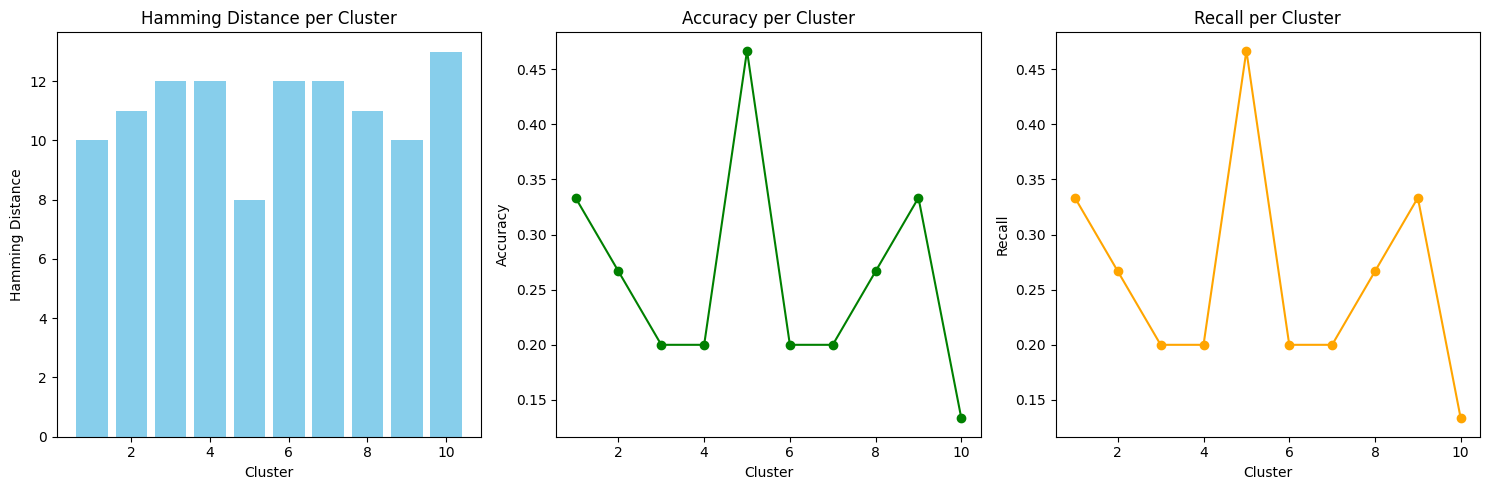

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Generate random DNA sequence
def generate_dna_sequence(N):
    return ''.join(random.choice('ACGT') for _ in range(N))

# Generate DNA sequences with implanted motif and mutations
def generate_dna_sequences(t, N, k, d):
    sequences = []
    motif = ''.join(random.choice('ACGT') for _ in range(k))

    for _ in range(t):
        seq = list(generate_dna_sequence(N))
        start = random.randint(0, N - k)
        for i in range(k):
            if random.random() < d / k:
                seq[start + i] = random.choice('ACGT')
            else:
                seq[start + i] = motif[i]
        sequences.append(''.join(seq))
    return sequences, motif

# Hamming distance between two strings
def hamming_distance(seq1, seq2):
    return sum([1 for a, b in zip(seq1, seq2) if a != b])

# Cluster sequences based on similarity
def cluster_sequences(sequences, k, d):
    clusters = []
    for seq in sequences:
        added = False
        for cluster in clusters:
            if hamming_distance(seq, cluster[0]) <= d:
                cluster.append(seq)
                added = True
                break
        if not added:
            clusters.append([seq])
    return clusters

# Refine motifs in each cluster
def refine_motifs_in_cluster(cluster, k):
    motifs = []
    for seq in cluster:
        motifs += [seq[i:i+k] for i in range(len(seq) - k + 1)]
    motif_counts = {m: motifs.count(m) for m in set(motifs)}
    return max(motif_counts, key=motif_counts.get)

# Main clustering algorithm
def cluster_refinement_algorithm(sequences, k, d):
    clusters = cluster_sequences(sequences, k, d)
    refined_motifs = [refine_motifs_in_cluster(cluster, k) for cluster in clusters]
    return refined_motifs

# Calculate scores
def evaluate(true_motif, refined_motifs):
    hamming_scores = []
    accuracies = []
    recalls = []

    for motif in refined_motifs:
        hd = hamming_distance(true_motif, motif)
        hamming_scores.append(hd)

        matches = sum(1 for a, b in zip(true_motif, motif) if a == b)
        accuracy = matches / len(true_motif)
        recall = matches / len(true_motif)

        accuracies.append(accuracy)
        recalls.append(recall)

    return hamming_scores, accuracies, recalls

# Visualize the results
def visualize(hamming_scores, accuracies, recalls):
    clusters = list(range(1, len(hamming_scores) + 1))
    plt.figure(figsize=(15, 5))

    # Hamming Distance
    plt.subplot(1, 3, 1)
    plt.bar(clusters, hamming_scores, color='skyblue')
    plt.title("Hamming Distance per Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Hamming Distance")

    # Accuracy
    plt.subplot(1, 3, 2)
    plt.plot(clusters, accuracies, marker='o', color='green')
    plt.title("Accuracy per Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Accuracy")

    # Recall
    plt.subplot(1, 3, 3)
    plt.plot(clusters, recalls, marker='o', color='orange')
    plt.title("Recall per Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Recall")

    plt.tight_layout()
    plt.show()

# -------------------- Main --------------------

# Parameters
t = 10   # Number of sequences
N = 100  # Length of each DNA sequence
k = 15   # Motif length (updated to 15)
d = 3    # Number of mutations (updated to 7)

# Generate data
sequences, true_motif = generate_dna_sequences(t, N, k, d)

# Run algorithm
refined_motifs = cluster_refinement_algorithm(sequences, k, d)

# Output motifs
print("True Motif:", true_motif)
print("Refined Motifs:")
for i, motif in enumerate(refined_motifs):
    print(f"Cluster {i + 1}: {motif}")

# Evaluation
hamming_scores, accuracies, recalls = evaluate(true_motif, refined_motifs)

# Summary
avg_hd = np.mean(hamming_scores)
avg_acc = np.mean(accuracies)
avg_rec = np.mean(recalls)

print(f"\nAverage Hamming Distance: {avg_hd:.2f}")
print(f"Average Accuracy: {avg_acc:.2f}")
print(f"Average Recall: {avg_rec:.2f}")

# Visualization
visualize(hamming_scores, accuracies, recalls)

